<a href="https://colab.research.google.com/github/JanMeow/T3PyTorchFacadeSegmentaion/blob/main/0817_SAM_Perspective_Adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing PerSAM

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00


##Load Model

In [ ]:
from transformers import AutoProcessor, SamModel
# from transformers import PerSamModel

processor = AutoProcessor.from_pretrained("facebook/sam-vit-huge")
# model = PerSamModel.from_pretrained("facebook/sam-vit-huge")
model = SamModel.from_pretrained("facebook/sam-vit-huge")

##Load Reference Image and mask

In [5]:
from google.colab import files
upload = files.upload()

Saving 3.jpg to 3.jpg


In [6]:
train_img = Path('/content/3.jpg')

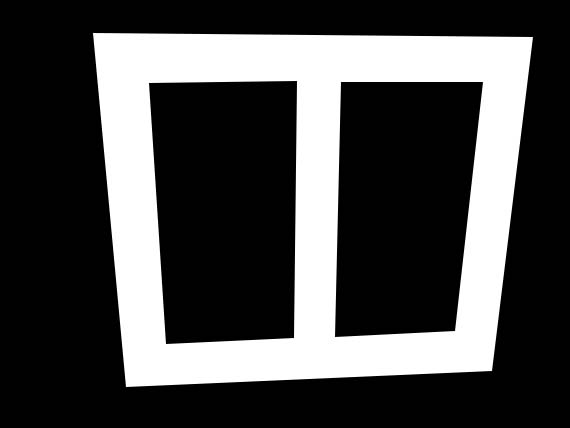

In [7]:
from huggingface_hub import hf_hub_download
from PIL import Image

ref_image = Image.open(train_img).convert("RGB")
ref_image

In [8]:
from PIL import Image
import numpy as np

numpy_array = np.array(ref_image)
print(numpy_array.shape)

(428, 570, 3)


In [13]:
numpy_array[0,0,:]

array([1, 1, 1], dtype=uint8)

In [24]:
crop = np.full_like(a=numpy_array, fill_value = 1,dtype= int)

In [28]:
mismatch_mask = numpy_array[...,-1] != crop[...,-1]
mismatched_pixel = np.argwhere(mismatch_mask)
print(mismatched_pixel)

[[ 32  88]
 [ 32  89]
 [ 32  90]
 ...
 [391 197]
 [391 198]
 [391 199]]


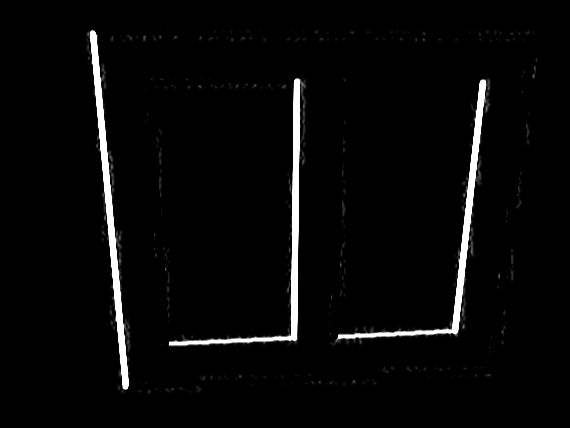

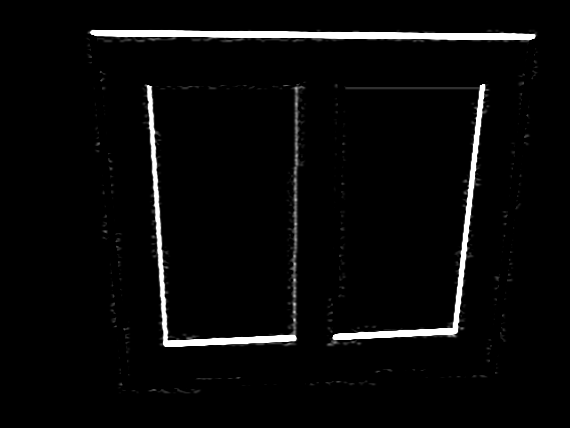

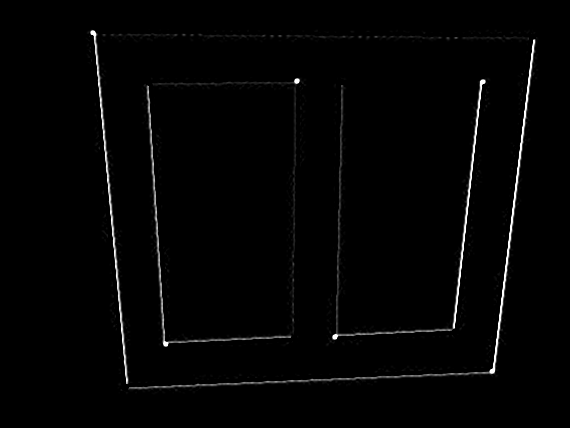

-1

In [50]:
import cv2
from google.colab.patches import cv2_imshow
#convert to grayscale
img_gray =cv2.cvtColor(numpy_array, cv2.COLOR_BGR2GRAY)
#Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3),0)

#Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)
cv2_imshow(sobely)
cv2.waitKey(0)
cv2_imshow(sobelxy)
cv2.waitKey(0)

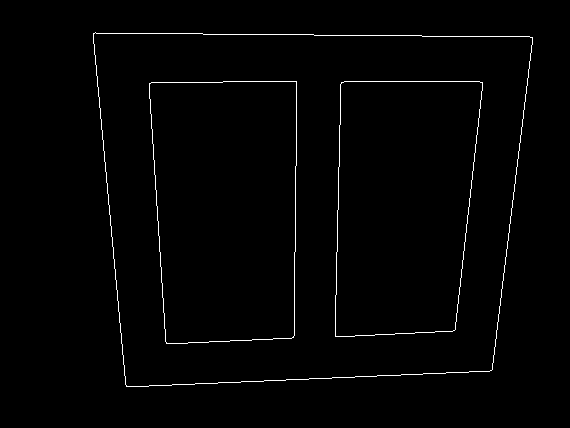

In [51]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
cv2_imshow(edges)

In [39]:
import numpy as np

#Target white pixel
numpy_array[0,0,:]
bg = np.array([255,255,255])
X,Y,_ = numpy_array.shape
corners = []
for x in range(X):
  for y in range(Y-1):
    current_pix = numpy_array[x,y,:]
    next_pix = numpy_array[x,y+1,:]
    if (current_pix==bg).all():
      corners.append((x,y))
corners

[(33, 95),
 (34, 94),
 (34, 96),
 (34, 97),
 (34, 98),
 (34, 99),
 (34, 100),
 (34, 101),
 (34, 102),
 (34, 103),
 (34, 104),
 (34, 105),
 (34, 106),
 (34, 107),
 (34, 108),
 (34, 109),
 (34, 110),
 (34, 111),
 (34, 112),
 (34, 113),
 (34, 114),
 (34, 115),
 (34, 120),
 (34, 121),
 (34, 122),
 (34, 123),
 (34, 124),
 (34, 128),
 (34, 129),
 (34, 130),
 (34, 131),
 (34, 136),
 (34, 137),
 (34, 138),
 (34, 139),
 (34, 144),
 (34, 145),
 (34, 146),
 (34, 147),
 (34, 152),
 (34, 153),
 (34, 154),
 (34, 155),
 (34, 160),
 (34, 161),
 (34, 168),
 (34, 169),
 (34, 170),
 (34, 200),
 (34, 201),
 (35, 96),
 (35, 97),
 (35, 98),
 (35, 99),
 (35, 100),
 (35, 101),
 (35, 102),
 (35, 103),
 (35, 112),
 (35, 113),
 (35, 114),
 (35, 115),
 (35, 116),
 (35, 117),
 (35, 133),
 (35, 134),
 (35, 135),
 (35, 140),
 (35, 141),
 (35, 142),
 (35, 143),
 (35, 147),
 (35, 148),
 (35, 149),
 (35, 150),
 (35, 151),
 (35, 155),
 (35, 156),
 (35, 157),
 (35, 158),
 (35, 159),
 (35, 160),
 (35, 161),
 (35, 162),
 (

In [ ]:
# from huggingface_hub import hf_hub_download
# from PIL import Image

# ref_image = Image.open(train_img).convert("RGB")
# ref_image